In [ ]:
"""
Data Project 2:
1. Import required libraries
2. Read csv
3. Show first records from csv
4. Show number of rows and columns
5. You need to find the values of alignment ,can use value_counts()
6. Find out only good alignment holders superheroes
7. Show first five records which you found in point 6
8. Show top five records having top speed of heroes of good alignment
9. Show 5 records of super heroes who have maximum power of good alignment
10. Find out how many super heroes are there with power 100 of good alignment
11. Shape them what you got in point 10
12. Show all records from point 10
13. Retrieve total of first five records of max power of good alignment super heroes
14. Draw a bar plot of all super heroes who are having good alignment and max power of
top five only , take same object of point 13 , show name and total in plot with green 
bars
15. Extract villains having bad alignment
16. Show first five records of point 15
17. Show top five fastest super villains in terms of super speed
18. Top five super villains in terms of intelligence
19. Show who is most dangerous super villain after calculating their total (top 5 only)
20. Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in 
histogram for only good alignment super heroes ,title should be "distribution of 
speed" , xlabel should be "speed"
21. Draw a histogram for combat of super villains having fig size 10,5 , provide combat in 
histogram for only bad alignment super heroes ,title should be "distribution of 
combat" , xlabel should be "combat"
*** Explain how you retrieve data with the help of comments in almost each section
"""

"""
Bonus: Can go beyond the scope and extract some different information on different 
characters and their properties. Can draw some more plots and histograms.
"""

In [1]:
#1. Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#2. Read csv
df = pd.read_csv("character_stats.csv")
df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [3]:
#3. Show first records from csv
df.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [4]:
#4. Show number of rows and columns

#print(f"There are {len(df)} rows and {len(df.columns)} columns.")

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

#

There are 611 rows and 9 columns.


In [5]:
#5. You need to find the values of alignment, can use value_counts()
alignment = df['Alignment'].value_counts()
alignment

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [7]:
#6. Find out only good alignment holders superheroes
goodAlign = df[['Name', 'Alignment']].loc[(df['Alignment']=='good')]
goodAlign


,Name,Alignment
0,3-D Man,good
1,A-Bomb,good
2,Abe Sapien,good
3,Abin Sur,good
6,Adam Monroe,good
...,...,...
604,X-Man,good
606,Yellowjacket,good
607,Yellowjacket II,good
608,Ymir,good


In [8]:
#7. Show first five records which you found in 6
goodAlign.head()

,Name,Alignment
0,3-D Man,good
1,A-Bomb,good
2,Abe Sapien,good
3,Abin Sur,good
6,Adam Monroe,good


In [9]:
#8. Show top five records having top speed of heroes of good alignment
goodSpeed = df[['Name', 'Alignment', 'Speed']].loc[(df['Alignment']=='good')].sort_values('Speed',ascending=False)
goodSpeed.head()

#good speed and sorted by total as well
#goodSpeedTotal = df[['Name', 'Alignment', 'Speed', 'Total']].loc[(df['Alignment']=='good')].sort_values(['Speed','Total'],ascending=False)
#goodSpeedTotal.head()

,Name,Alignment,Speed
231,Flash III,good,100
304,Jack of Hearts,good,100
295,Impulse,good,100
525,Stardust,good,100
447,Quicksilver,good,100


In [38]:
#9. Show 5 records of super heroes who have maximum power of good alignment
goodPower = df[['Name', 'Alignment', 'Power']].loc[(df['Alignment']=='good')].sort_values('Power', ascending=False)
goodPower.head(5)

#max power and sorted by total as well
#goodPowerTotal =  df[['Name', 'Alignment', 'Power', 'Total']].loc[(df['Alignment']=='good')].sort_values(['Power','Total'], ascending=False)
#goodPowerTotal.head()

,Name,Alignment,Power
609,Zatanna,good,100
546,Thor,good,100
511,Spawn,good,100
69,Beta Ray Bill,good,100
70,Beyonder,good,100


In [31]:
#10. Find out how many super heroes are there with power 100 of good alignment
goodMaxPower = df[['Power', 'Name']].where(df['Alignment']=='good').groupby("Power").count().sort_values('Power', ascending=False).rename(columns={"Name": "# of Heroes"})
goodMaxPower

,# of Heroes
Power,
100.0,33
98.0,2
97.0,3
94.0,2
92.0,3
...,...
10.0,1
7.0,1
5.0,1


In [33]:
#11. Shape them what you got in point 10
goodMaxPower.shape

(83, 1)

In [32]:
#12. Show all records from point 10
goodMaxPower

,# of Heroes
Power,
100.0,33
98.0,2
97.0,3
94.0,2
92.0,3
...,...
10.0,1
7.0,1
5.0,1


In [16]:
#13. Retrieve total of first five records of max power of good alignment super heroes
goodSuper = df[['Name', 'Power', 'Total']].loc[(df['Alignment']=='good')].sort_values(['Power', 'Total'], ascending=False).head()
goodSuper.head()

,Name,Power,Total
361,Martian Manhunter,100,581
525,Stardust,100,568
546,Thor,100,546
417,Nova,100,538
251,Goku,100,521


Text(0, 0.5, "'Total' Value")

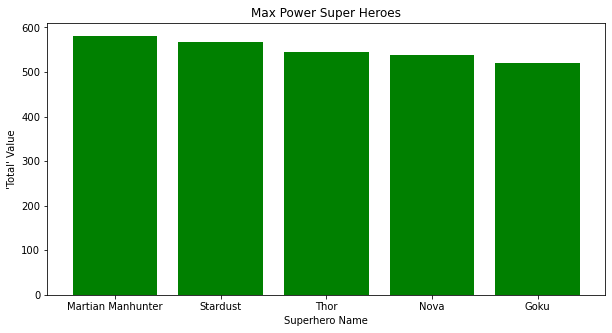

In [18]:
"""
14. Draw a bar plot of all super heroes who are having good alignment and max power of 
top five only , take same object of point 13 , show name and total in plot with green bars
"""

plt.figure(figsize=(10,5))
plt.bar(goodSuper['Name'], goodSuper['Total'], color='Green')
plt.title('Max Power Super Heroes')
plt.xlabel('Superhero Name')
plt.ylabel("'Total' Value")

In [19]:
#15. Extract villains having bad alignment
evil = df[['Name', 'Alignment']].loc[(df['Alignment']=='bad')]
evil

,Name,Alignment
4,Abomination,bad
5,Abraxas,bad
11,Air-Walker,bad
16,Amazo,bad
17,Ammo,bad
...,...,...
586,Warp,bad
590,Weapon XI,bad
593,Willis Stryker,bad
605,Yellow Claw,bad


In [20]:
#16. Show first five records of point 15
evil.head()

,Name,Alignment
4,Abomination,bad
5,Abraxas,bad
11,Air-Walker,bad
16,Amazo,bad
17,Ammo,bad


In [21]:
#17. Show top five fastest super villains in terms of super speed
badSpeed = df[['Name', 'Alignment', 'Speed', 'Total']].loc[(df['Alignment']=='bad')].sort_values(['Speed', 'Total'], ascending=False)
badSpeed.head()


,Name,Alignment,Speed,Total
535,Superboy-Prime,bad,100,579
16,Amazo,bad,100,575
11,Air-Walker,bad,100,460
610,Zoom,bad,100,288
242,General Zod,bad,96,579


In [22]:
#18. Top five super villains in terms of intelligence
badIntel = df[['Name', 'Alignment', 'Intelligence', 'Total']].loc[(df['Alignment']=='bad')].sort_values(['Intelligence','Total'], ascending=False)
badIntel.head()

,Name,Alignment,Intelligence,Total
386,Mister Mxyzptlk,bad,113,277
29,Apocalypse,bad,100,493
194,Doctor Doom,bad,100,429
321,Kang,bad,100,417
122,Brainiac,bad,100,416


In [23]:
#19. Show who is most dangerous super villain after calculating their total (top 5 only)
badTotal = df[['Name', 'Alignment', 'Total']].loc[(df['Alignment']=='bad')].sort_values('Total', ascending=False)
badTotal.head()

,Name,Alignment,Total
535,Superboy-Prime,bad,579
242,General Zod,bad,579
16,Amazo,bad,575
203,Dormammu,bad,546
201,Doomsday,bad,545


Text(0, 0.5, '# of Heroes')

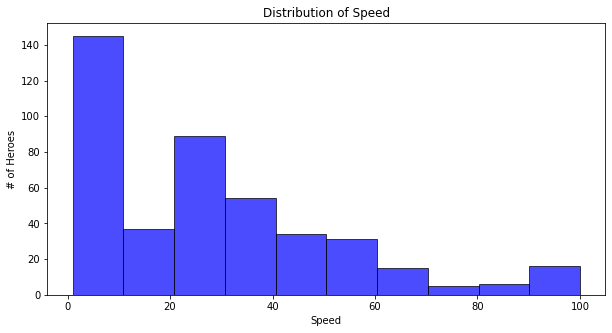

In [24]:
"""
20. Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in 
histogram for only good alignment super heroes ,title should be "distribution of 
speed" , xlabel should be "speed
"""
hero = df[['Speed']].loc[(df['Alignment']=='good')].sort_values('Speed', ascending=False)
hero.head()

plt.figure(figsize=(10,5))
plt.hist(hero, bins=10, edgecolor='black', alpha=0.7, color='Blue')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('# of Heroes')

Text(0, 0.5, '# of Villians')

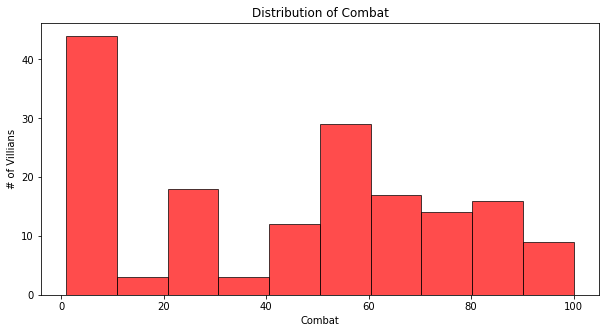

In [25]:
"""
21. Draw a histogram for combat of super villains having fig size 10,5 , provide combat in 
histogram for only bad alignment super heroes ,title should be "distribution of 
combat" , xlabel should be "combat"
"""

villian = df[['Combat']].loc[(df['Alignment']=='bad')].sort_values('Combat', ascending=False)
villian.head()

plt.figure(figsize=(10,5))
plt.hist(villian, bins=10, edgecolor='black', alpha=0.7, color='Red')
plt.title('Distribution of Combat')
plt.xlabel('Combat')
plt.ylabel('# of Villians')


In [ ]:
"""
Bonus: Can go beyond the scope and extract some different information on different 
characters and their properties. Can draw some more plots and histograms.
"""